# 회귀 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##  경사하강법

### (1) 수치 미분법 

#### 중심 차분법

In [3]:
def numerical_derivative(func, x):
    delta = 1E-4 # 0.0001       # 1.0* 10의-4승
    return (func(x+delta) - func(x-delta)) / (2*delta)

In [4]:
def func1(x):
    return x**2

In [5]:
numerical_derivative(func1, 2.0)

4.000000000004

In [7]:
for i in range(0,11):
    print(i, ':', numerical_derivative(func1, float(i)))

0 : 0.0
1 : 1.9999999999992246
2 : 4.000000000004
3 : 6.000000000012662
4 : 7.999999999999119
5 : 9.999999999976694
6 : 11.999999999972033
7 : 13.999999999967372
8 : 15.999999999927184
9 : 17.99999999995805
10 : 19.99999999995339


### 다중 변수 미분 계수 구하기
수치 미분법에 의한 

In [30]:
# def numerical_derivative(f, a): #f:다변수 함수, a:모든 변수값을 포함하고 있는 1차원 numpy배열
#     delta = 1E-4
    
#     grad = np.zeors_like(a) # 각 변수마다, 계산된 수치 미분계수 값
    
#     for idx in range(len(a)):
        
#         tmp_val = a[idx]  #임시보관
#         a[idx] = tmp_val + delta
#         fx1 = f(a)      # f(x+delta, y) 계산
        
#         a[idx] = tmp_val - delta
#         fx2 = f(a)      # f(x-delta, y) 계산        
#         grad[idx] = (fx1-fx2) / (2+delta)
        
#         a[idx] = tmp_val
#     else:
#         return grad


def numerical_derivative(f, a): #f:다변수 함수, 
    import numpy as np  #a:모든 변수값을 포함하고 있는 1차원 numpy배열
    delta = 1E-4
    
    grad = np.zeros_like(a) # 각 변수마다, 계산된 수치 미분계수 값
    
    for idx in range(len(a)):
        
        tmp_val = a[idx]  #임시보관
        a[idx] = tmp_val + delta
        fx1 = f(a)      # f(x+delta, y) 계산
        
        a[idx] = tmp_val - delta
        fx2 = f(a)      # f(x-delta, y) 계산        
        grad[idx] = (fx1-fx2) /(2*delta)
        
        a[idx] = tmp_val
    else:
        return grad

In [31]:
def MSE(p):  # p : array([W,b])
    global x, y
    y_pred =  x*p[0]+p[1]
    return  np.mean((y-y_pred)**2)

In [32]:
def predict(x, p): # p : array([W,b])
    return x * p[0]+p[1]

In [33]:
def drawGraphs(x, y, W, b, W_history, b_history):
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    axes[0].plot(W_history, 'b-', b_history, 'r--')

    xx = np.linspace(x.min()-1,x.max()+1, 100)
    yy = W*xx + b
    axes[1].scatter(x, y)
    axes[1].plot(xx, yy, c='r')
    plt.show()   

In [34]:
def numericalderiv_LinearRegression(x, y, lr=0.01, max_iters=1000):
    import random

    W =float(random.randint(-10, 10))
    b =float(random.randint(-10, 10))


    W_history =  [W]
    b_history =  [b]

    cost =  MSE(np.array([W,b]))
    print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost)

    rate =   lr # Learning rate
    MaxItrs = max_iters

    for epoch in range(1,MaxItrs+1):  #epoch: 반복 횟수
        gradientW, gradientB  =  numerical_derivative(MSE, np.array([W, b]))
        W =  W - rate * gradientW      #Grad descent 경사하강법
        b =  b - rate * gradientB       #Grad descent   경사하강법
        W_history.append(W)
        b_history.append(b)

        cost =  MSE(np.array([W,b]))

        if len(str(epoch))==1 or epoch %100==0 or epoch==MaxItrs:
            print('Epochs:', epoch, 
                  'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
                  end=' ')
            print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost)) #Print result 
            
    else:
        print('W=', W, 'b=', b)
        print('참값:', y)
        print('예측:', predict(x, np.array([W,b])))
        drawGraphs(x, y, W,b, W_history, b_history)
        return W, b

Epochs: 0 	W: 0.0 	b: 6.0 	cost: 29.0
Epochs: 1 gradient W: -8.00, gradient b:10.00,  W:0.08, b:5.90, cost: 27.40
Epochs: 2 gradient W: -7.36, gradient b:9.80,  W:0.15, b:5.80, cost: 25.92
Epochs: 3 gradient W: -6.77, gradient b:9.60,  W:0.22, b:5.71, cost: 24.57
Epochs: 4 gradient W: -6.23, gradient b:9.41,  W:0.28, b:5.61, cost: 23.32
Epochs: 5 gradient W: -5.73, gradient b:9.22,  W:0.34, b:5.52, cost: 22.16
Epochs: 6 gradient W: -5.27, gradient b:9.04,  W:0.39, b:5.43, cost: 21.09
Epochs: 7 gradient W: -4.85, gradient b:8.86,  W:0.44, b:5.34, cost: 20.09
Epochs: 8 gradient W: -4.46, gradient b:8.68,  W:0.49, b:5.25, cost: 19.15
Epochs: 9 gradient W: -4.11, gradient b:8.51,  W:0.53, b:5.17, cost: 18.27
Epochs: 100 gradient W: -0.00, gradient b:1.35,  W:1.00, b:1.66, cost: 0.44
Epochs: 200 gradient W: -0.00, gradient b:0.18,  W:1.00, b:1.09, cost: 0.01
Epochs: 300 gradient W: -0.00, gradient b:0.02,  W:1.00, b:1.01, cost: 0.00
Epochs: 400 gradient W: -0.00, gradient b:0.00,  W:1.00, b

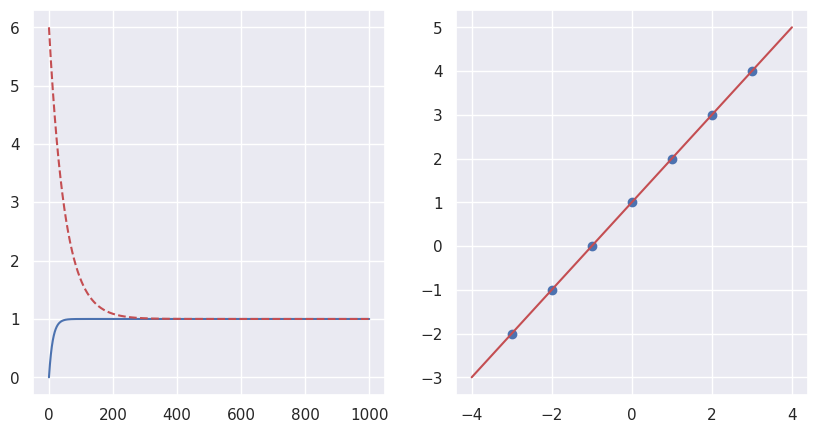

In [35]:
x = np.array( [-3, -2, -1, 0, 1, 2, 3] )
y = np.array([-2, -1, 0, 1, 2, 3, 4] )
W, b = numericalderiv_LinearRegression(x, y)

Epochs: 0 	W: -1.0 	b: 6.0 	cost: 16.215714285714288
Epochs: 1 gradient W: -15.69, gradient b:1.80,  W:-0.84, b:5.98, cost: 13.82
Epochs: 2 gradient W: -14.43, gradient b:1.76,  W:-0.70, b:5.96, cost: 11.79
Epochs: 3 gradient W: -13.28, gradient b:1.73,  W:-0.57, b:5.95, cost: 10.07
Epochs: 4 gradient W: -12.21, gradient b:1.69,  W:-0.44, b:5.93, cost: 8.61
Epochs: 5 gradient W: -11.24, gradient b:1.66,  W:-0.33, b:5.91, cost: 7.37
Epochs: 6 gradient W: -10.34, gradient b:1.63,  W:-0.23, b:5.90, cost: 6.32
Epochs: 7 gradient W: -9.51, gradient b:1.59,  W:-0.13, b:5.88, cost: 5.42
Epochs: 8 gradient W: -8.75, gradient b:1.56,  W:-0.05, b:5.87, cost: 4.66
Epochs: 9 gradient W: -8.05, gradient b:1.53,  W:0.03, b:5.85, cost: 4.02
Epochs: 100 gradient W: -0.00, gradient b:0.24,  W:0.96, b:5.22, cost: 0.04
Epochs: 200 gradient W: -0.00, gradient b:0.03,  W:0.96, b:5.12, cost: 0.03
Epochs: 300 gradient W: -0.00, gradient b:0.00,  W:0.96, b:5.10, cost: 0.03
Epochs: 400 gradient W: 0.00, gradie

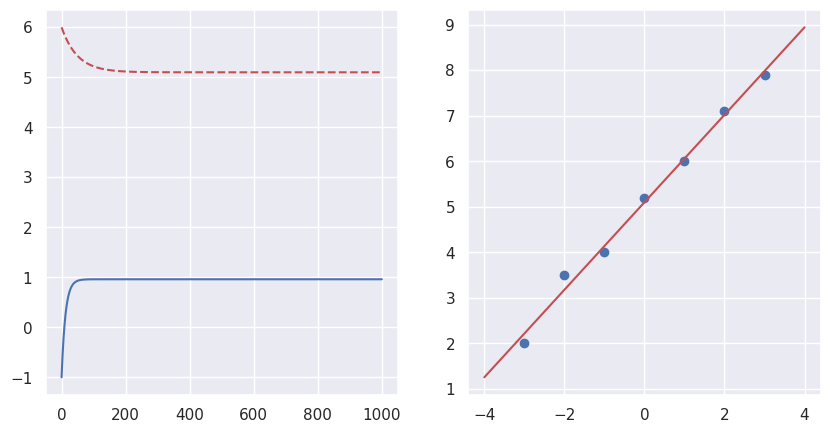

In [36]:
x = np.array( [-3, -2, -1, 0, 1, 2, 3]  )
y = np.array( [2, 3.5, 4, 5.2, 6, 7.1, 7.9] )
W, b = numericalderiv_LinearRegression(x,y)

### (2) 해석적 미분법

### Python으로 미분식 구하는 방법

In [ ]:
from sympy import symbols, Derivative

In [ ]:
x = 
fx = 3*x**2 -4*x +1    # 함수식

In [ ]:
n, x, W, b, y =
fx =  # MSE 함수식

In [ ]:
del W, b, y, x, n

### 해석적 방법에 의한 회귀 분석

In [ ]:
#Gradient
def gradient(x, y, w, b):


In [ ]:
def analytical_LinearRegression(x, y, lr=0.01, max_iters=1000):
    import random

    W =float(random.randint(-10, 10))
    b =float(random.randint(-10, 10))


    W_history =  
    b_history = 

    cost =  
    print("Epochs:",0,"\tW:",W,"\tb:",b,"\tcost:",cost)

    rate =   lr # Learning rate
    MaxItrs = max_iters

    for epoch in range(1,MaxItrs+1):  #epoch: 반복 횟수
        gradientW, gradientB  =  
        W =  
        b = 
        W_history.append(W)
        b_history.append(b)

        cost =  

        if len(str(epoch))==1 or epoch %100==0 or epoch==MaxItrs:
            print('Epochs:', epoch, 
                  'gradient W: %.2f, gradient b:%.2f, ' %(gradientW, gradientB), 
                  end=' ')
            print("W:%.2f, b:%.2f, cost: %.2f" % (W, b, cost)) #Print result 
            
    else:
        print('W=', W, 'b=', b)
        print('참값:', y)
        print('예측:',    )
        drawGraphs(x, y, W,b, W_history, b_history)
        return W, b

In [ ]:
x = np.array( [-3, -2, -1, 0, 1, 2, 3] )
y = np.array( [-2, -1, 0, 1, 2, 3, 4])
W, b = 

In [ ]:
x = np.array( [-3, -2, -1, 0, 1, 2, 3]  )
y = np.array( [2, 3.5, 4, 5.2, 6, 7.1, 7.9] )
W, b = 

## 랜덤 자료에 대한 단순 선형 회귀 분석

In [ ]:
rng = np.random.RandomState(42)
x = 
y = 2*x -1

plt.figure(figsize=(4,4))
plt.scatter(x, y)
plt.show()

In [ ]:
df=pd.DataFrame()
df['x']= x
df['y']= y

plt.figure(figsize=(4,4))
sns.regplot(x='x', y='y', data=df)
plt.show()

### Scikit Learn 활용

In [ ]:
x = 
print(x.shape)    
print(y.shape) 

In [ ]:
from sklearn.linear_model import 
model = 


In [ ]:
print('기울기:', model.coef_)
print('y절편:', model.intercept_)

In [ ]:
xx =  
yy =  

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(xx, yy, c='r', marker='o')
plt.show() 

## 다중 선형 회귀 분석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ICTIS_2023/data/boston_house_price.csv", 
                 index_col= )

In [ ]:
# 다중회귀 자료 준비
x = 
y =

In [ ]:
print('계수:', model.coef_)
print('y절편:', model.intercept_)

In [ ]:
y_pred =

In [ ]:
from sklearn.metrics import mean_squared_error
print('score=', model.(x , y))
print('MSE=', mean_squared_error(  ,y_pred ))

# Logistic Regression

## iris 종 분류 사례

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame= True)
df = iris.frame
df.info()

In [ ]:
sdf = pd.DataFrame()
sdf['petal_length'] = df['petal length (cm)']
sdf['species'] = df['target']
sdf = 

In [ ]:
sns.pairplot(data=sdf, vars=['petal_length', 'species'], hue='species')
plt.show()

In [ ]:
sns. (x='petal_length', y='species', data=sdf, logistic= )
plt.show()

In [ ]:
# 학습 데이터, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( , 
                                                     , 
                                                    test_size=0.33)

x_train.shape, y_train.shape

In [ ]:
from sklearn.linear_model import LogisticRegression


print('계수:', model.coef_)
print('y절편:', model.intercept_)

In [ ]:
def sigmoid(z):
    

In [ ]:
xx = np.linspace(1,sl_df['petal_length'].max(),1000)
z = 
yy = 

In [ ]:
plt.scatter(sl_df['petal_length'], sl_df['species'])
plt.plot(xx, yy, 'r')
plt.xlim(sdf['petal_length'].min()-0.1, sdf['petal_length'].max()+0.1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(  ,    ))

In [ ]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(  , annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    plt.show()

In [ ]:
dispConfusionMatrix( ,  )

In [ ]:
print(classification_report(  ))

In [ ]:
print(confusion_matrix(y_test, ))

In [ ]:
dispConfusionMatrix(y_test, )

In [ ]:
print(classification_report(y_test, ))